In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
#Import Metropolitan Area Map
gdf=gpd.read_file('raw_data/tl_2010_us_cbsa10')

In [3]:
#Import Segregation Indices by Metro Area
df=pd.read_excel('raw_data/segindex/msa10p.xls', sheet_name='Sheet1', dtype={'metroid_cbsa_codes' : str})

In [4]:
#merge segregation into metro maps
seg_gdf=pd.merge(gdf,df,left_on='CBSAFP10', right_on='metroid_cbsa_codes', how='inner')

In [5]:
#Keep only the contiguous 48
seg_gdf['state']=seg_gdf['NAME10'].str.slice(-2,)

seg_gdf=seg_gdf[~seg_gdf['state'].isin(['AK','HI'])]

In [6]:
#convert exposure index to isolation index for more intuitive presentation
seg_gdf['black_isolation_index'] = 100-seg_gdf['m_xbw_a_10']

In [7]:
#import states gdf
state_gdf=gpd.read_file('raw_data/tl_2010_us_state10')

In [8]:
#Just the lower 48
remove=['Puerto Rico','Hawaii','Alaska']
ml_states=state_gdf[~state_gdf['NAME10'].isin(remove)]


In [9]:
#Convert metro area shapes into centroids
seg_gdf['centroid']=seg_gdf.centroid
seg_gdf=seg_gdf.set_geometry('centroid')

Text(0.5, 1.0, 'Black-White Segregation by Metro Area')

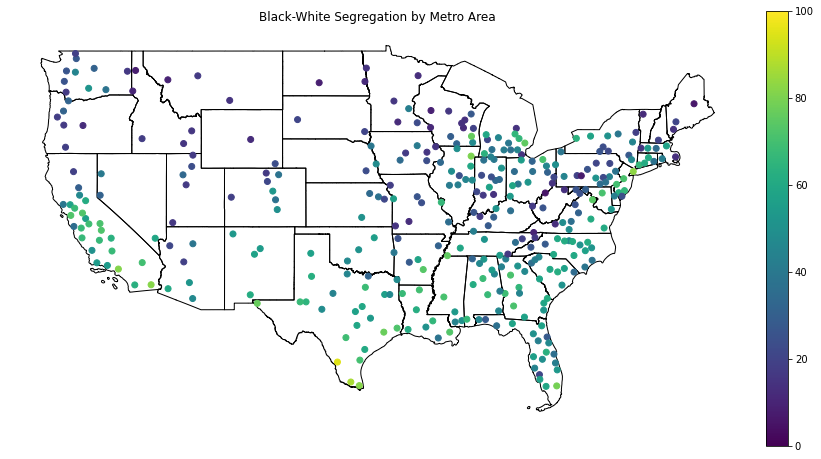

In [10]:
#Create map showing the segregation index of metro areas

base=ml_states.plot(color='none', edgecolor='black', figsize=(16,20))
base.set_axis_off()

seg_gdf.plot(column='black_isolation_index',ax=base, legend=True, legend_kwds={'shrink' : .4, 'pad' : .02}, vmin=0,vmax=100)
base.set_title('Black-White Segregation by Metro Area')